In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D1-Cristina/S4/Office_Cristina-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),24):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+24, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (329, 24, 1)
y_train.shape =  (329, 24)
X_test.shape =  (29, 24, 1)
y_test.shape =  (29, 24)


In [11]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(24))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
3/3 [==============================] - 1s 10ms/step - loss: 11.8362
Epoch 2/300
3/3 [==============================] - 0s 10ms/step - loss: 11.4457
Epoch 3/300
3/3 [==============================] - 0s 7ms/step - loss: 11.0668
Epoch 4/300
3/3 [==============================] - 0s 8ms/step - loss: 10.7023
Epoch 5/300
3/3 [==============================] - 0s 8ms/step - loss: 10.3497
Epoch 6/300
3/3 [==============================] - 0s 7ms/step - loss: 9.9982
Epoch 7/300
3/3 [==============================] - 0s 7ms/step - loss: 9.6576
Epoch 8/300
3/3 [==============================] - 0s 7ms/step - loss: 9.3168
Epoch 9/300
3/3 [==============================] - 0s 7ms/step - loss: 8.9789
Epoch 10/300
3/3 [==============================] - 0s 7ms/step - loss: 8.6440
Epoch 11/300
3/3 [==============================] - 0s 11ms/step - loss: 8.3082
Epoch 12/300
3/3 [==============================] - 0s 8ms/step - loss: 7.9680
Epoch 13/300
3/3 [==============================] - 0

In [13]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [16]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [17]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 0.8952236702122288
Root Mean Squared Error for RNN Model for testing is: 0.8782163642764995
Mean Absolute Error for RNN Model for training is: 0.7009258499678762
Mean Absolute Error for RNN Model for testing is: 0.7196598977944341
MAPE for RNN Model for training is: 0.2509182664651885
MAPE for RNN Model for testing is: 0.23885014345870237


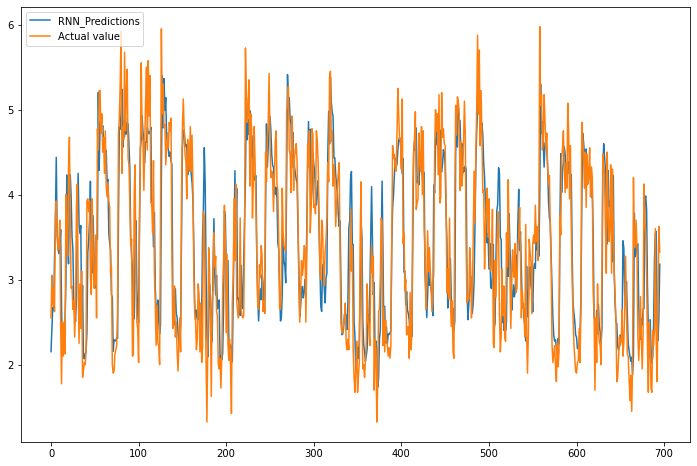

In [ ]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([2.54999995]), array([2.152262], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([0.39773798]), array([0.63091612]), array([0.02484226]), array([0.26425028]), array([-0.61540103]), array([0.03490615]), array([-0.51378703]), array([0.02428102]), array([-0.02334642]), array([0.11778426]), array([0.3512702]), array([-1.11596942]), array([-0.93030536]), array([0.38780403]), array([-0.23969459]), array([0.25138474]), array([-0.39023948]), array([1.04680943]), array([-0.6563251]), array([-0.15105033]), array([1.13937688]), array([0.73570204]), array([-0.5330441]), array([-1.0616591]), array([-0.57983184]), array([-0.70040965]), array([0.02206016]), array([-0.30019426]), array([0.14318275]), array([1.07302117]), array([0.37001276]), array([-1.30007839]), array([-1.40122819]), array([-0.59393883]), array([-1.21169329]), array([0.58447266]), array([-1.08246243]), array([-0.18526983]), array([-0.04393148]), array([-0.13161159]), array([0.00124502]), array([1.55038309]), array([0.63547063]), array([0.33520007]), array([0.22266293]), array([-1.13133717]), array([-0.4668

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.09049702]), array([-1.67285609]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(368, 328)